### Dataset

nb_joints = 8

```
                        |-----------------|
joint_states [qj, qdotj]|                 |
------------------------|                 |
baselink vel - BF       |                 |    tau_ff (size: nb_joints x 1)
------------------------|                 |---------------------
baselink_n, omega - BF  |                 |    q_j_des (size: nb_joints x 1)
------------------------|                 |---------------------
goal(vx_des, vy_des) BF |                 |    q_j_vel_des (size: nb_joints x 1)
------------------------|                 |---------------------
t_since_contact (R)     |                 |
t_since_no_contact (R)  |                 |    
------------------------|                 |
t_since_contact (L)     |                 |
t_since_no_contact (L)  |                 |
------------------------|                 |
pos_right_foot (BF)     |                 |
------------------------|                 |
pos_left_foot (BF)      |                 |
------------------------|-----------------|
```


BF - baselink frame

L - left

R - right

baselink_n - normal vector in body frame (i.e. n_I = [0, 0, 1], n_B = R.T@n_I)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('dataset.csv')
dataset.head()



,time,L_YAW_pos,L_HAA_pos,L_HFE_pos,L_KFE_pos,L_ANKLE_pos,R_YAW_pos,R_HAA_pos,R_HFE_pos,R_KFE_pos,...,L_YAW_q_vel des,L_HAA_q_vel des,L_HFE_q_vel des,L_KFE_q_vel des,L_ANKLE_q_vel des,R_YAW_q_vel des,R_HAA_q_vel des,R_HFE_q_vel des,R_KFE_q_vel des,R_ANKLE_q_vel des
0,1.683856e+09,-0.000176,0.245201,0.816034,-1.379751,0.544271,-0.000171,0.250262,0.545131,-0.930868,...,-0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.000000e+00,-0.000000,0.000000,0.000000,-0.000000
1,1.683856e+09,-0.000092,0.245230,0.816287,-1.379936,0.544110,0.000007,0.250155,0.546636,-0.933440,...,-4.201167e-09,-0.029674,-6.948954,11.006275,-4.057321,1.898147e-09,0.016543,0.133338,-0.221984,0.088646
2,1.683856e+09,0.000142,0.245127,0.816594,-1.380189,0.544174,0.000319,0.249781,0.549551,-0.938564,...,-4.201167e-09,-0.029674,-6.948954,11.006275,-4.057321,1.898147e-09,0.016543,0.133338,-0.221984,0.088646
3,1.683856e+09,0.000470,0.244958,0.816920,-1.380473,0.544382,0.000569,0.249121,0.552920,-0.944396,...,-4.201167e-09,-0.029674,-6.948954,11.006275,-4.057321,1.898147e-09,0.016543,0.133338,-0.221984,0.088646
4,1.683856e+09,0.000859,0.244756,0.817247,-1.380766,0.544677,0.000689,0.248182,0.556324,-0.950148,...,-4.201167e-09,-0.029674,-6.948954,11.006275,-4.057321,1.898147e-09,0.016543,0.133338,-0.221984,0.088646


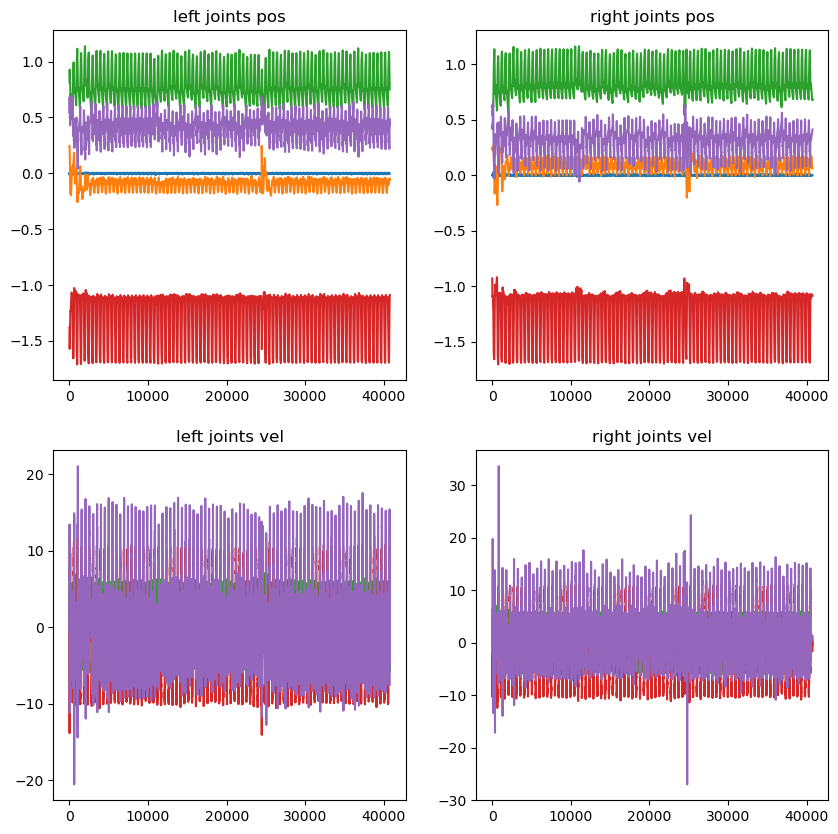

In [2]:
# plot all the joints
list_joints_names = ['YAW', 'HAA', 'HFE', 'KFE', 'ANKLE']


fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for joint_name in list_joints_names:
    axs[0,0].set_title('left joints pos')
    axs[0,0].plot(dataset['L_'+ joint_name + '_pos'])
    axs[0,1].set_title('right joints pos')
    axs[0,1].plot(dataset['R_'+ joint_name + '_pos'])

    axs[1,0].set_title('left joints vel')
    axs[1,0].plot(dataset['L_'+ joint_name + '_vel'])
    axs[1,1].set_title('right joints vel')
    axs[1,1].plot(dataset['R_'+ joint_name + '_vel'])

# print(len(dataset['L_'+ joint_name + '_pos']))


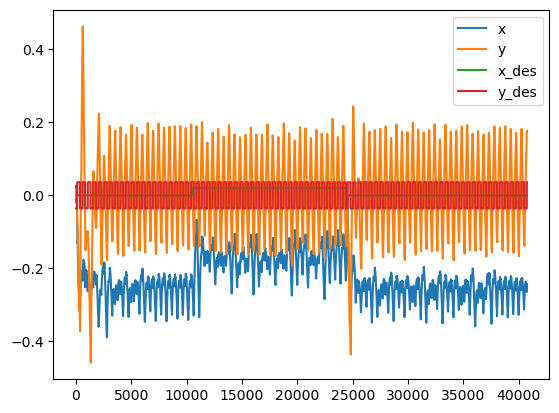

In [3]:

plt.plot(dataset['vel_x_BF'], label='x')
plt.plot(dataset['vel_y_BF'], label='y')
plt.plot(dataset['vx_des_BF'], label='x_des')
plt.plot(dataset['vy_des_BF'], label='y_des')
# plt.plot(dataset['vel_z_BF'], label='z')
plt.legend()
# Note, see the fact that we walk with higher velocity at some point (aka not walk backwards lol)